# Dakota Notebook

I noticed that a good number of the articles in our database only reference "North Korea" once or twice. Most of them are in fact about other issues that only reference North Korea in passing. So what I instead did was to only keep articles with "North Korea" in the title OR articles that reference "North Korea" at least 5 times. The Constellate dataset online still includes all of the articles for your reference (https://constellate.org/dataset/9c60acd8-32df-302c-335a-7f699c05cbe1/?unigrams=human+rights%2C+nuclear%2C+military). But the wordclouds and topic model worked much better when just keeping the roughly 750 articles that focus on North Korea. 

In [21]:
import pandas as pd
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

First we need to load our dataset. 

In [79]:
nk_df = pd.read_csv("NK_full_model.csv")
nk_df

,Unnamed: 0,index,Unnamed: 0.1,creator,datePublished,docSubType,docType,id,identifier,isPartOf,issueNumber,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,doi,sequence,subTitle,nk_count,clean_text_string,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Dominant_topic
0,0,0,0,['Tony Bertuca'],2016-09-14,research-article,article,http://www.jstor.org/stable/24789351,"[{'name': 'issn', 'value': '21648158'}, {'name...",Inside Missile Defense,19,['eng'],"['unigram', 'bigram', 'trigram']",2,5.0,1.0,"p. 1, 5",jstor,2016,Inside Washington Publishers,"['Military Studies', 'Peace & Conflict Studies...",['Political science - Military science'],Carter offers U.S. 'nuclear umbrella' on heels...,http://www.jstor.org/stable/24789351,22,1654,NaN,NaN,NaN,0,resolution report cites patriot patriot korea...,0.027449,0.000235,0.336907,0.073506,0.000415,0.008730,0.099992,0.022768,0.047438,0.045396,0.161188,0.008845,0.011822,0.003170,0.014577,0.062253,0.035772,0.000187,0.019178,0.020173,2
1,1,4,4,"['Nuno P. Monteiro', 'Alexandre Debs']",2014-10-01,research-article,article,http://www.jstor.org/stable/24480582,"[{'name': 'issn', 'value': '01622889'}, {'name...",International Security,2,['eng'],"['unigram', 'bigram', 'trigram']",45,51.0,7.0,pp. 7-51,jstor,2014,The MIT Press,"['Peace & Conflict Studies', 'Political Scienc...","['Political science - Military science', 'Phil...",The Strategic Logic of Nuclear Proliferation,http://www.jstor.org/stable/24480582,39,20669,NaN,NaN,NaN,8,used secured face motivations motivations ove...,0.042563,0.000020,0.000752,0.005437,0.071856,0.000147,0.005783,0.006971,0.072040,0.176842,0.151655,0.011169,0.009987,0.024689,0.026142,0.342869,0.020410,0.001572,0.021747,0.007348,15
2,2,63,63,['Daniel G. Dupont'],2001-09-10,research-article,article,http://www.jstor.org/stable/24819288,"[{'name': 'issn', 'value': '21648182'}, {'name...",Inside the Army,36,['eng'],"['unigram', 'bigram', 'trigram']",2,9.0,1.0,"p. 1, 9",jstor,2001,Inside Washington Publishers,"['Military Studies', 'Peace & Conflict Studies...",['Political science - Military science'],Strike concept geared toward North Korean rock...,http://www.jstor.org/stable/24819288,13,1441,NaN,NaN,ARMY STUDYING POTENTIAL OFFENSIVE ROLE FOR PAT...,0,procurement procurement procurement power mai...,0.000857,0.001734,0.480216,0.079359,0.000440,0.001821,0.123758,0.000354,0.059169,0.003530,0.069756,0.016797,0.014009,0.006329,0.000588,0.046641,0.069091,0.000198,0.020318,0.005032,2
3,3,69,69,['CHARLES D. FERGUSON'],2006-01-01,research-article,article,http://www.jstor.org/stable/42763057,"[{'name': 'issn', 'value': '07391854'}, {'name...",Harvard International Review,4,['eng'],"['unigram', 'bigram', 'trigram']",6,57.0,52.0,pp. 52-57,jstor,2006,Harvard International Review,"['Political Science', 'Social Sciences']","['Law - Computer law', 'Political science - Mi...",On the Loose: The Market for Nuclear Weapons,http://www.jstor.org/stable/42763057,27,3510,NaN,NaN,NaN,12,centrifuges centrifuges centrifuges centrifug...,0.000905,0.010434,0.003035,0.030109,0.013954,0.003001,0.015687,0.007029,0.046423,0.472878,0.048794,0.053014,0.032984,0.003021,0.099010,0.076039,0.039348,0.016732,0.027382,0.000223,9
4,4,74,74,['Graham Allison'],2005-07-01,research-article,article,http://www.jstor.org/stable/40204058,"[{'name': 'issn', 'value': '00207020'}, {'name...",International Journal,3,['eng'],"['unigram', 'bigram', 'trigram']",10,722.0,713.0,pp. 713-722,jstor,2005,"Sage Publications, Ltd.","['Political Science', 'Social Sciences', 'Inte...","['Law - Computer law', 'Political science - Mi...",Is Nuclear Terrorism a Threat to Canada's Nati...,http://www.jstor.org/stable/40204058,60,3916,NaN,NaN,NaN,5,farmland late reduction condoleezza ties repo...,0.009648,0.001261,0.007731,0.022

Next, we can visualize the 728 articles by year. Here we can see that the year distribution roughly follows the same pattern as the full Constellate dataset, although se do find some fluctuation in the 2000s.

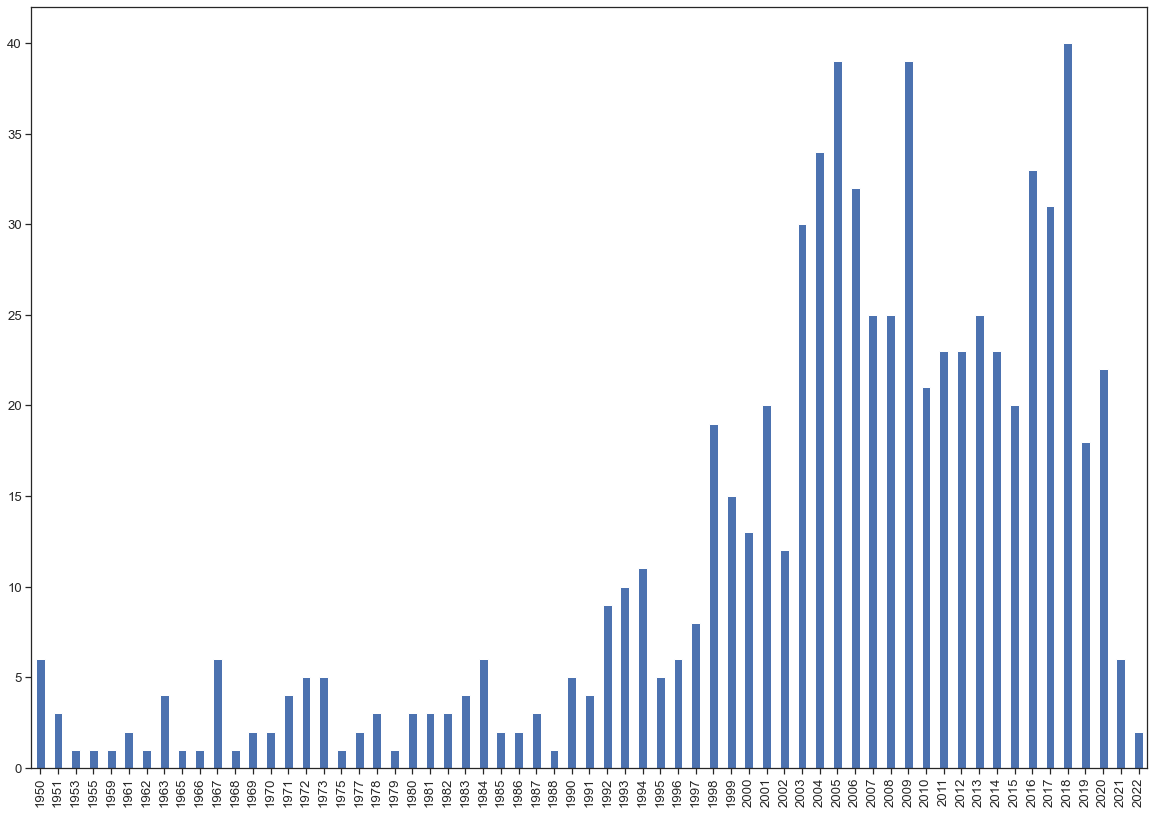

In [103]:
years = nk_df['publicationYear'].value_counts()
years = years.sort_index()
years.plot(kind="bar", figsize=(20, 14))

## Wordcloud #1: Full
Now we can start making word clouds. The first word cloud here is for all 728 articles. I also didn't filter out any additional stopwords. 

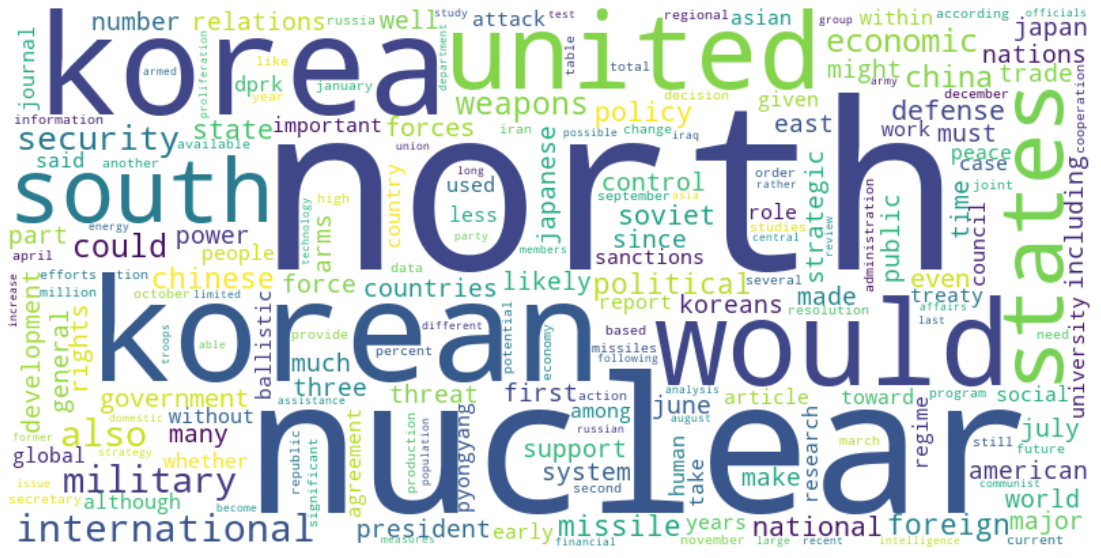

In [104]:
##FULL WORD CLOUD

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

variable = "clean_text_string"
#creating string containing all UHQ texts
df2 = nk_df[nk_df[variable].notna()]

full_list = ' '.join([str(elem) for elem in df2[variable].tolist()]).split()

word_cloud_dict=Counter(full_list)

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud #2: Pre-1980 articles
Here is the wordcloud for articles dating before 1980. I also filtered out some of the most common stopwords, including: 'korean','korea','north','south','would', 'also', 'even', 'could', 'koreans'.

  A couple of words that stand out to me here: soviet, united states, united nations, communist, security, etc. 

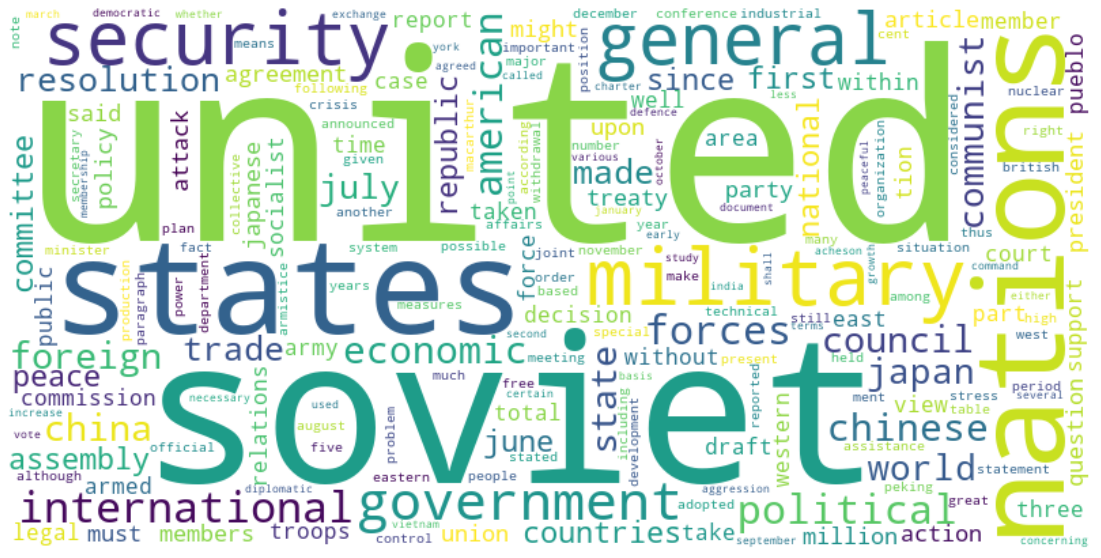

In [105]:
##PRE-1980

from wordcloud import WordCloud
import matplotlib.pyplot as plt

variable = "clean_text_string"
#creating string containing all UHQ texts
df2 = nk_df[nk_df.publicationYear < 1980]

word_could_dict=Counter(' '.join([str(elem) for elem in df2[variable].tolist()]).split())

ignore = ['korean','korea','north','south','would', 'also', 'even', 'could', 'koreans']
for word in ignore:
    if word in word_could_dict:
        del word_could_dict[word]
        

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud #3: 1980-2000 articles
I again filtered out the same stopwords as above. Comparing wordcloud 2 and wordcloud 3, do you notice any words that got bigger or smaller? 

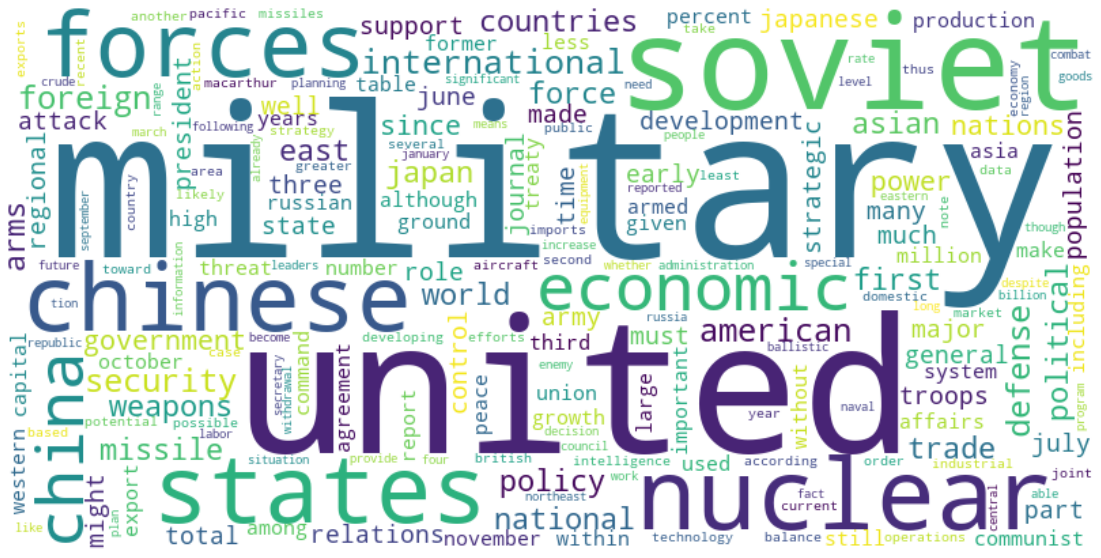

In [106]:
#1980-2000

from wordcloud import WordCloud
import matplotlib.pyplot as plt

variable = "clean_text_string"
#creating string containing all UHQ texts
df2 = nk_df[(nk_df.publicationYear >= 1980) & (nk_df.publicationYear < 2000)]

word_could_dict=Counter(' '.join([str(elem) for elem in df2[variable].tolist()]).split())

ignore = ['korean','korea','north','south','would', 'also', 'even', 'could', 'koreans']
for word in ignore:
    if word in word_could_dict:
        del word_could_dict[word]

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud #4: 2000-present
How is the discourse changing from wordcloud #3 to #4? How about from #2 to #4?

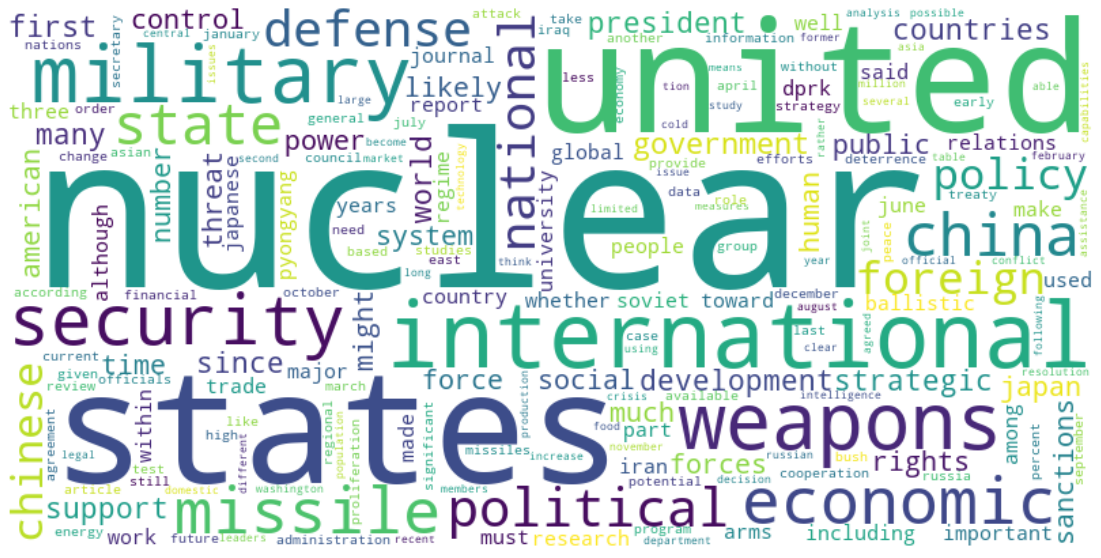

In [107]:
#2000-present

from wordcloud import WordCloud
import matplotlib.pyplot as plt

variable = "clean_text_string"
#creating string containing all UHQ texts
df2 = nk_df[(nk_df.publicationYear >= 2000)]

word_could_dict=Counter(' '.join([str(elem) for elem in df2[variable].tolist()]).split())

ignore = ['korean','korea','north','south','would', 'also', 'even', 'could', 'koreans']
for word in ignore:
    if word in word_could_dict:
        del word_could_dict[word]

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# TOPIC MODELING

I generated a 20 topic model that we will just load here rather than run it over again. What topics look interesting to you? 

In [109]:
## LOAD THE TOPIC MODEL AND PRINT THE RESULTS

model = tp.LDAModel.load('NK_MODEL.bin')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

united security japan states president japanese military korea would american

✨Topic 1✨

korean social koreans refugees people cultural refugee china border defectors

✨Topic 2✨

missile defense ballistic missiles system arms north launch could systems

✨Topic 3✨

development global cooperation international also regional major assistance economic support

✨Topic 4✨

political public international journal research data policy social university table

✨Topic 5✨

north population food korea rate percent labor data system total

✨Topic 6✨

military forces army force east soviet defense operations command soldiers

✨Topic 7✨

korean june communist july british macarthur general august november armistice

✨Topic 8✨

state world political even power international must rather fact within

✨Topic 9✨

nuclear weapons north states iran korea arms iaea would bush

✨Topic 10✨

would could might much make like many even policy think

✨Topic 11✨

economic trade fo

Potential topics of interest might include Topic 17 on human rights, Topic 14 on sanctions against the dprk, or perhaps Topic 1 on refugees. We can now look at the top articles associated with each topic. 

In [116]:
topic_num = 17 #Change this number to look at different topics

print("TOPIC "+str(topic_num))

top_10 = nk_df.sort_values(by=['Topic '+str(topic_num)], ascending=False)[:10]

for title, year, prob in zip(top_10.title.tolist(), top_10.publicationYear.tolist(), top_10['Topic '+str(topic_num)].tolist()):
    print(title + " (" + str(year) + ")")
    print(prob)
    print("")

TOPIC 17
Disability, Human Rights Violations, and Crimes Against Humanity (2022)
0.5669656991958618

Sham Constitutions (2013)
0.5646352767944336

THE STRUCTURE AND FUNCTIONS OF THE NORTH KOREAN COURT SYSTEM (1969)
0.3690227270126343

Korean Constitutional Law Confronted with the Possibility of Reunification: Can German Experiences Help? (2008)
0.3450537621974945

The Judicial System of North Korea (1971)
0.3441852927207947

Human Rights Diffusion in North Korea: The Impact of Transnational Legal Mobilization (2017)
0.3390429615974426

The Diplomatic Importance of States, 1816-1970: An Extension and Refinement of the Indicator (1973)
0.2871413230895996

South Africa and Abusive Regimes at the UN Human Rights Council (2014)
0.28468579053878784

THE INTERNATIONAL CRIMINAL COURT AND THE PARADOX OF AUTHORITY (2016)
0.2720547318458557

CONTEMPORARY PRACTICE OF THE UNITED STATES RELATING TO INTERNATIONAL LAW (2013)
0.2571255564689636



Now that you see the top articles associated with a topic, does the topic still make sense? Does it look like the topic model worked? 

Finally, we can view the distribution of the topic above over time. There will likely be a lot of annual fluctuation in these results, but can you find any general trends? For example, topic 17 on human rights appears to have first appeared in the 1970s, then again in the 2000s reaching its peak in the 2010s.

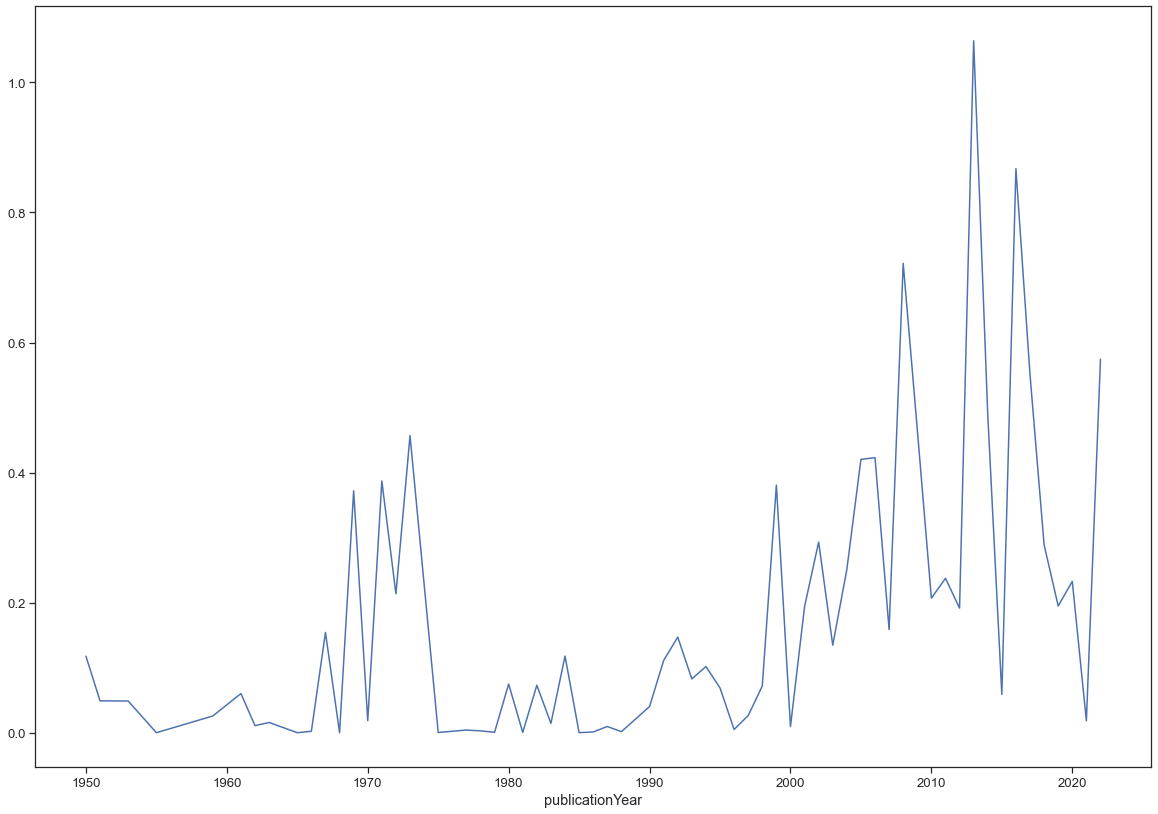

In [124]:
output = nk_df.groupby('publicationYear')["Topic "+str(topic_num)].sum()
output.plot(figsize=(20, 14))

# What now? 
We have obtained some really interesting results that you can describe in your paper. I think the big question that will require your domain expertise is answering *why* we see certain trends. What is taking place in the 1970s and 2000s regarding human rights in North Korea that led to an increased interest? Or why does "nuclear" appear so prominent in the wordclouds from recent decades? Some of these questions will be easier to answer than others. Just remember that digital history is more than just telling us that certain trends exist. It is also about explaining what was happening historically that might explain these trends. I'm excited to see what you find!